In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv(r"C:\Users\nivet\OneDrive\Desktop\googleplaystore.csv")

###  Getting the first and last 5 rows of the dataset

In [10]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Finding the number of rows and columns

In [13]:
print(f"The number of rows in the dataset is {data.shape[0]}")
print(f"The number of columns in the dataset is {data.shape[1]}")

The number of rows in the dataset is 10841
The number of columns in the dataset is 13


### Finding the stats of the data

In [15]:
# by default, it returns the numerical columns only
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

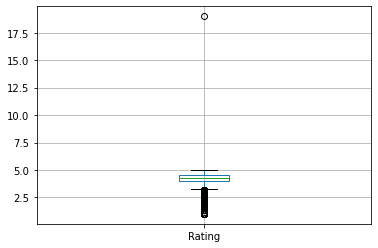

In [16]:
# to visualise the distribution of data and identify outliers if any
data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

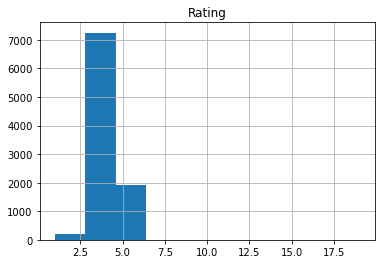

In [17]:
data.hist()

### Getting the gist of the dataset

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Cleaning

#### Count the number of missing values in the dataset, if any.

In [20]:
print(f"Are there any null values in the dataset? {data.isnull().values.any()}")

Are there any null values in the dataset? True


In [22]:
# counting the number of missing values in each column
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Checking for outliers

In [26]:
print(f"The number of outliers present in the dataset is {len(data[data['Rating']>5])}")

The number of outliers present in the dataset is 1


In [27]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [30]:
data.drop([10472],inplace=True)

<AxesSubplot:>

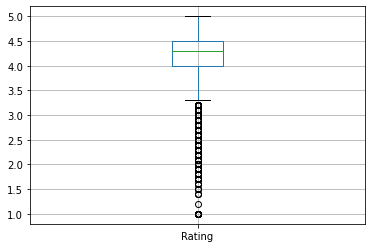

In [31]:
data.boxplot()
# this shows that most data is concentrated within the box.

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

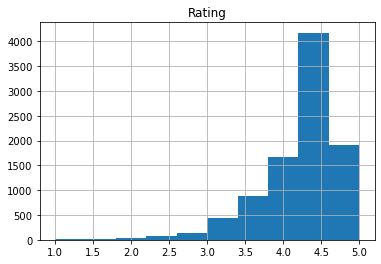

In [32]:
data.hist()
# the histogram shows that the data is rightly skewed

### Remove columns that are 90% empty

In [33]:
threshold = len(data)*0.1
threshold

1084.0

In [35]:
# removing the columns which don't even have 10% of the values
data.dropna(thresh=threshold,axis=1,inplace=True)

In [36]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Data Imputaion and Manipulation

#### Fill the null values using appropriate values using aggregate functions such as mean, median and mode

In [39]:
# Define a function impute_median, which take a column(series) and computeds and fills with median
def impute_median(series):
    return series.fillna(series.median())

In [41]:
data['Rating'] = data['Rating'].transform(impute_median)

In [42]:
# count the number of null values in each column
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [44]:
# modes of categorical values
print(data["Type"].mode())
print(data["Current Ver"].mode())
print(data["Android Ver"].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [48]:
# Fill the missing categorical values with mode
data['Type'].fillna(str(data['Type'].mode().values[0]), inplace = True)
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]), inplace = True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]), inplace = True)

In [49]:
# count the number of null values in each column
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [74]:
# Convert the price, reviews and ratings into numerical values
data['Price'] = data['Price'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))
data['Reviews'] = pd.to_numeric(data['Reviews'],errors = 'coerce')

In [75]:
# converting the installs column to float
data['Installs'] = data['Installs'].apply(lambda x:str(x).replace('+','') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [76]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revies
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967


In [77]:
# summary stats after cleaning
data.describe()

,Rating,Reviews,Installs,Price,Revies
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000,1.084000e+04
mean,4.206476,4.441529e+05,1.546434e+07,1.027368,4.441529e+05
std,0.480342,2.927761e+06,8.502936e+07,15.949703,2.927761e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.800000e+01,1.000000e+03,0.000000,3.800000e+01
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,2.094000e+03
75%,4.500000,5.477550e+04,5.000000e+06,0.000000,5.477550e+04
max,5.000000,7.815831e+07,1.000000e+09,400.000000,7.815831e+07


### Data Visualization

In [78]:
# Grouping the data by category
grp = data.groupby('Category')
# Getting the mean rating for each category
x = grp['Rating'].agg(np.mean)
# Getting the sum of prices for each category
y = grp['Price'].agg(np.sum)
# Getting the mean revies per category
z = grp['Reviews'].agg(np.mean)

#### A plot that depics the mean ratings per category

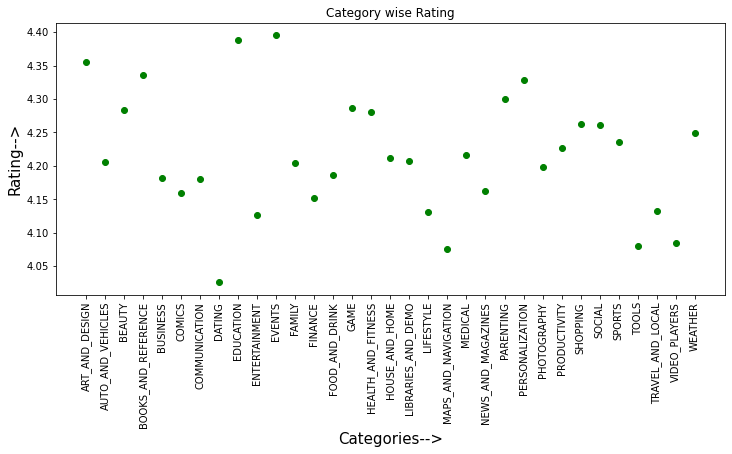

In [84]:
# To make the plot big as easy to read
plt.figure(figsize=(12,5))
# Plotting the rating per each category as green dots
plt.plot(x,'ro',color='g')
# Making the category name comprehendable by rotating it
plt.xticks(rotation = 90)
# setting title and labels
plt.title('Category wise Rating')
plt.xlabel('Categories-->',fontsize=15)
plt.ylabel('Rating-->',fontsize=15)
# To show only the graph
plt.show()

#### A plot that depicts the sum of prices per category

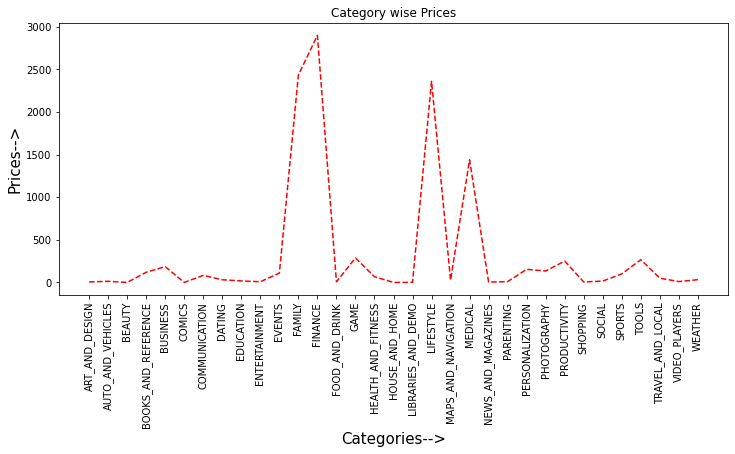

In [89]:
# To make the plot big as easy to read
plt.figure(figsize=(12,5))
# Plotting the sum(price) per each category as red dashed lines
plt.plot(y,'r--',color = 'r')
# Making the category name comprehendable by rotating it
plt.xticks(rotation = 90)
# setting title and labels
plt.title('Category wise Prices')
plt.xlabel('Categories-->',fontsize=15)
plt.ylabel('Prices-->',fontsize=15)
# To show only the graph
plt.show()

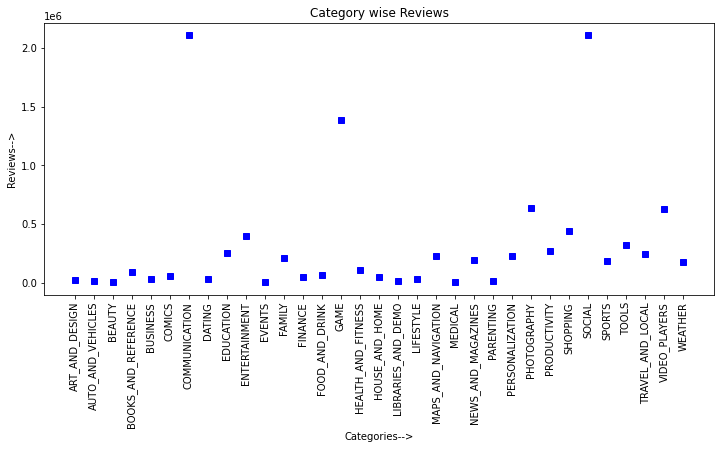

In [95]:
# To make the plot big as easy to read
plt.figure(figsize=(12,5))
# Plotting the sum(price) per each category as red dashed lines
plt.plot(z,'bs',color='b')
# Making the category name comprehendable by rotating it
plt.xticks(rotation = 90)
# setting title and labels
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
# To show only the graph
plt.show()


In [98]:
data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revies
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.3,38,9.8M,5000.0,Free,0.0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up,38
10832,FR Tides,WEATHER,3.8,1195,582k,100000.0,Free,0.0,Everyone,Weather,"February 16, 2014",6,2.1 and up,1195
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,44
10834,FR Calculator,FAMILY,4.0,7,2.6M,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,7
10835,FR Forms,BUSINESS,4.3,0,9.6M,10.0,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,38
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,4
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up,3
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,114
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000.0,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,398307
